In [4]:
from numpy import pi as PI
from scipy.stats import skew, kurtosis
from scipy.integrate import quad
from scipy.spatial.distance import pdist, cdist, squareform

import scipy
import random
import pandas as pd
import numpy as np
import ringity as rng
import networkx as nx
import matplotlib.pyplot as plt

### Sample distribution

In [20]:
beta = np.random.uniform()

kapp = np.tan(PI/2*beta)
lamb = 1/kapp

In [21]:
N = 2**12

delays = rng.get_delays(N, param=beta)

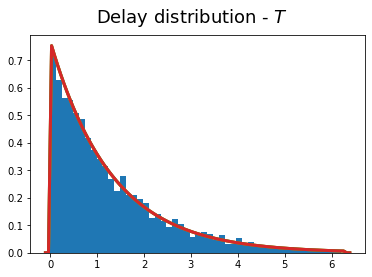

In [22]:
x = np.linspace(-0.1,2*np.pi+0.1,100)

plt.hist(delays, density=True, bins=50);

plt.plot(x, rng.pdf_delay(x, lamb, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_delay(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_delay(x, beta, 'delay'), linewidth=3)

plt.suptitle("Delay distribution - $T$", fontsize=18);

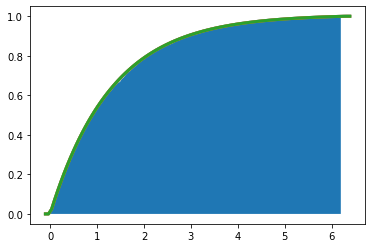

In [23]:
cdf_x = np.sort(delays)
cdf_y = np.arange(len(delays))/len(delays)

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_delay(x, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.cdf_delay(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_delay(x, beta, 'delay'), linewidth=3)

### Absolute distance

In [24]:
abs_dists = pdist(delays.reshape(-1,1))

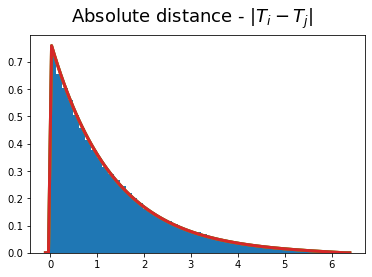

In [25]:
x = np.linspace(-0.1,2*np.pi+0.1,100)

plt.hist(abs_dists, density=True, bins=50);

plt.plot(x, rng.pdf_absolute_distance(x, lamb, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_absolute_distance(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_absolute_distance(x, beta, 'delay'), linewidth=3)

plt.suptitle("Absolute distance - $|T_i - T_j|$", fontsize=18);

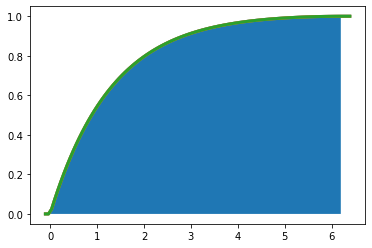

In [26]:
cdf_x = np.sort(abs_dists)
cdf_y = np.arange(len(abs_dists))/len(abs_dists)

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_absolute_distance(x, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.cdf_absolute_distance(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_absolute_distance(x, beta, 'delay'), linewidth=3)

### Circular distance

In [27]:
circ_dists = rng.delays_to_distances(delays)

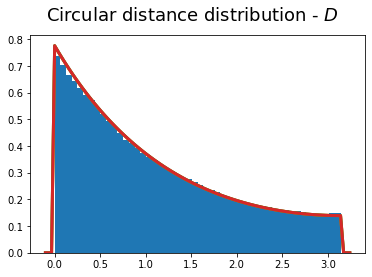

In [28]:
x = np.linspace(-0.1,np.pi+0.1,100)

plt.hist(circ_dists, density=True, bins=50);

plt.plot(x, rng.pdf_circular_distance(x, lamb, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_circular_distance(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_circular_distance(x, beta, 'delay'), linewidth=3)

plt.suptitle("Circular distance distribution - $D$", fontsize=18);

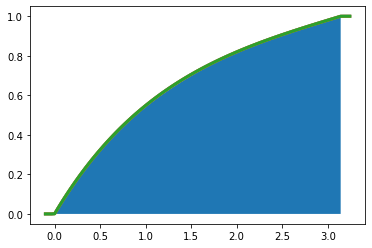

In [29]:
cdf_x = np.sort(circ_dists)
cdf_y = np.arange(len(circ_dists))/len(circ_dists)

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_circular_distance(x, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.cdf_circular_distance(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_circular_distance(x, beta, 'delay'), linewidth=3)

### Similarity

In [30]:
a = np.random.uniform(0, 0.5)
print(a)

simis = rng.distances_to_similarities(dists=circ_dists, a=a)

0.3297513011950428


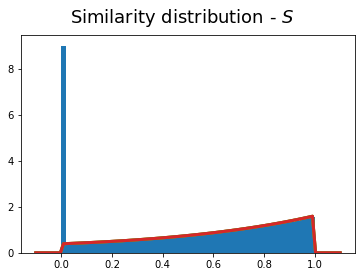

In [31]:
x = np.linspace(-0.1,1+0.1,100)

plt.hist(simis, density=True, bins=50);

plt.plot(x, rng.pdf_similarity(x, lamb, a, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_similarity(x, kapp, a, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_similarity(x, beta, a, 'delay'), linewidth=3)

plt.suptitle("Similarity distribution - $S$", fontsize=18);

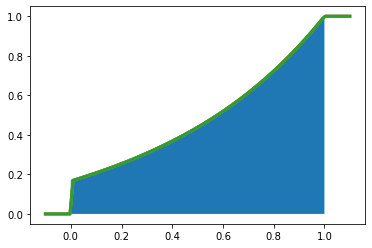

In [32]:
cdf_x = np.sort(simis)
cdf_y = np.arange(len(simis))/len(simis)

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_similarity(x, lamb, a, 'rate' ), linewidth=3)
plt.plot(x, rng.cdf_similarity(x, kapp, a, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_similarity(x, beta, a, 'delay'), linewidth=3)

In [33]:
print(np.mean(simis))

0.5078372604234561


In [34]:
print(rng.mean_similarity(lamb, a, 'rate'))
print(rng.mean_similarity(kapp, a, 'shape'))
print(rng.mean_similarity(beta, a, 'delay'))

0.5143487508129532
0.5143487508129532
0.5143487508129532


### Probability

In [37]:
rho = np.random.uniform(0,0.5)
mu_S = rng.mean_similarity(lamb, a)

assert rho <= mu_S
k = rho/mu_S

probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type='delay')

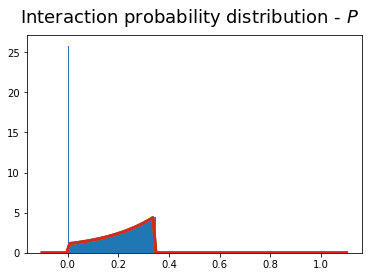

In [38]:
x = np.linspace(-0.1,1+0.1,100)

plt.hist(probs, density=True, bins=50);

plt.plot(x, rng.pdf_probability(x, lamb, a, rho, 'rate'), linewidth=3)
plt.plot(x, rng.pdf_probability(x, kapp, a, rho, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_probability(x, beta, a, rho, 'delay'), linewidth=3)

plt.suptitle("Interaction probability distribution - $P$", fontsize=18);

AssertionError: Not implemented yet!

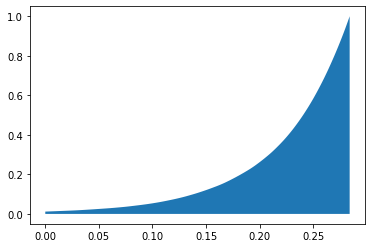

In [19]:
cdf_x = np.sort(probs)
cdf_y = np.arange(len(k*simis))/len(k*simis)

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_probability(x, lamb, a, rho, 'rate' ), linewidth=3)
plt.plot(x, rng.cdf_probability(x, kapp, a, rho, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_probability(x, beta, a, rho, 'delay'), linewidth=3)

### density

In [20]:
N = 2**10
rho = np.random.uniform()
beta = np.random.uniform()
a = np.random.uniform(0,0.5)

obs_rhos = []

for i in range(100):
    delas = rng.get_delays(N, beta)
    dists = rng.delays_to_distances(delas)
    simis = rng.distances_to_similarities(dists, a=a)
    probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
    obs_rhos.append(np.mean(probs))
    
print(np.mean(obs_rhos))

0.5955738759337741


In [21]:
rho

0.595381999821228

AssertionError: Not implemented yet!

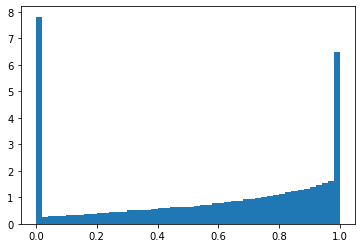

In [22]:
x = np.linspace(-0.1,1+0.1,100)

plt.hist(probs, density=True, bins=50);

plt.plot(x, rng.pdf_probability(x, beta, a, rho, 'delay'), linewidth=3)

### Conditional absolute distance

In [23]:
beta = np.random.uniform()
kapp = np.tan(PI/2*beta)
lamb = 1/kapp

print(beta)

0.30425798638678425


In [24]:
N = 2**17
positions = rng.get_positions(N, beta=beta)
delas = rng.get_delays(N, param = beta)

In [25]:
theta, = random.sample(list(delays), 1)

In [26]:
abs_dists = np.abs(delas-theta)

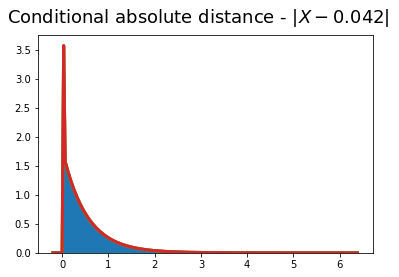

In [27]:
x = np.linspace(-0.2, 2*PI+0.1, 200)

plt.hist(abs_dists, density=True, bins=100);

plt.plot(x, rng.pdf_conditional_absolute_distance(x, theta, lamb, 'rate'), linewidth=3)
plt.plot(x, rng.pdf_conditional_absolute_distance(x, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_conditional_absolute_distance(x, theta, beta, 'delay'), linewidth=3)

plt.suptitle(rf"Conditional absolute distance - $|X-{theta:.3f}|$ ", fontsize=18);

In [28]:
cdf_x = np.sort(abs_dists)
cdf_y = np.arange(N)/N

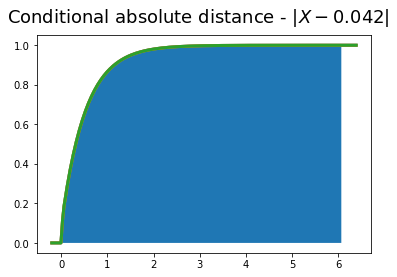

In [29]:
plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_conditional_absolute_distance(x, theta, lamb, 'rate'), linewidth=3)
plt.plot(x, rng.cdf_conditional_absolute_distance(x, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_conditional_absolute_distance(x, theta, beta, 'delay'), linewidth=3)

plt.suptitle(rf"Conditional absolute distance - $|X-{theta:.3f}|$", fontsize=18);

### Conditional circular distance

In [30]:
circ_dists = np.minimum(abs_dists, 2*PI-abs_dists)

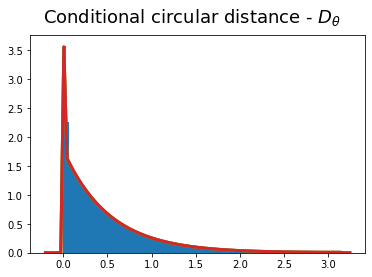

In [31]:
x = np.linspace(-0.2,PI+0.1,100)

plt.hist(circ_dists, density=True, bins=100);

plt.plot(x, rng.pdf_conditional_circular_distance(x, theta, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.pdf_conditional_circular_distance(x, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_conditional_circular_distance(x, theta, beta, 'delay'), linewidth=3)

plt.suptitle(r"Conditional circular distance - $D_{\theta}$", fontsize=18);

In [32]:
cdf_x = np.sort(circ_dists)
cdf_y = np.arange(N)/N

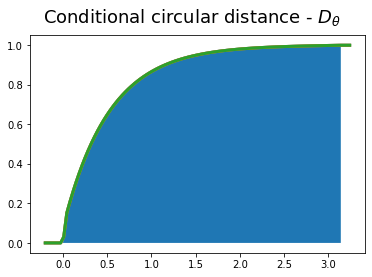

In [33]:
plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_conditional_circular_distance(x, theta, lamb, 'rate'), linewidth=3)
plt.plot(x, rng.cdf_conditional_circular_distance(x, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_conditional_circular_distance(x, theta, beta, 'delay'), linewidth=3)

plt.suptitle(r"Conditional circular distance - $D_{\theta}$", fontsize=18);

### Conditional similarity

In [34]:
a = np.random.uniform(0,0.5)

simis = rng.distances_to_similarities(circ_dists, a=a)

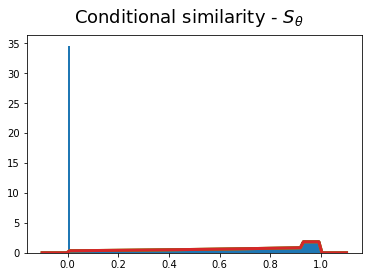

In [35]:
x = np.linspace(-0.1,1+0.1,100)

plt.hist(simis, density=True, bins=100);

plt.plot(x, rng.pdf_conditional_similarity(x, theta, a, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.pdf_conditional_similarity(x, theta, a, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_conditional_similarity(x, theta, a, beta, 'delay'), linewidth=3)

plt.suptitle(r"Conditional similarity - $S_{\theta}$", fontsize=18);

AssertionError: Not implemented yet!

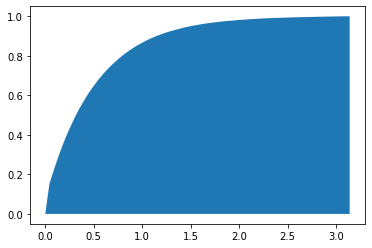

In [36]:
#  Not implemented yet!

cdf_x = np.sort(circ_dists)
cdf_y = np.arange(N)/N

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_conditional_similarity(x, a, theta, lamb, 'rate'), linewidth=3)
plt.plot(x, rng.cdf_conditional_similarity(x, a, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_conditional_similarity(x, a, theta, beta, 'delay'), linewidth=3)


plt.suptitle(r"Conditional similarity - $S_{\theta}$", fontsize=18);

### Conditional probability

In [37]:
rho = np.random.uniform(0,0.1)
mu_S = rng.mean_similarity(lamb, a)

assert rho <= mu_S
k = rho/mu_S

probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=lamb)

print(rho)
print(np.mean(rho))

0.015335755500460013
0.015335755500460013


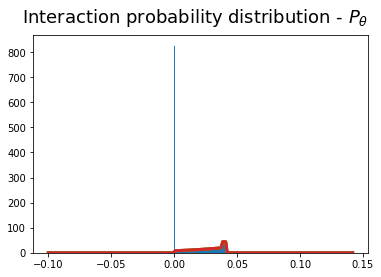

In [38]:
x = np.linspace(-0.1, k+0.1, 200)

plt.hist(probs, density=True, bins=100);
plt.plot(x, rng.pdf_conditional_probability(x, theta, lamb, a, rho, 'rate'), linewidth=3)
plt.plot(x, rng.pdf_conditional_probability(x, theta, kapp, a, rho, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_conditional_probability(x, theta, beta, a, rho, 'delay'), linewidth=3)

plt.suptitle(r"Interaction probability distribution - $P_{\theta}$", fontsize=18);

### Degree counts

In [2]:
N = 2**12
rho = np.random.uniform(0,0.5)
beta = np.random.uniform()
a = np.random.uniform(0,0.5)

#### Single node

In [3]:
def expected_node_degree1(theta, a, rho, parameter, parameter_type = 'rate'):
    return quad(lambda x : x*rng.pdf_conditional_probability(x, theta=theta, a = a, rho = rho,
                                                             parameter = parameter, 
                                                             parameter_type = parameter_type), 0, 1)[0]

def expected_node_degree2(theta, a, rho, parameter, parameter_type = 'rate'):
    
    if a > 0.5:
        assert False, "Not implemented yet!"
    
    rate = rng.get_rate_parameter(parameter, parameter_type)
    mu_S = rng.mean_similarity(rate,a)
    k = rho/mu_S
    
    if k > 1:
        assert False, "Not implemented yet!"
        
    normalization = 1 / ((1-np.exp(-2*PI*rate)) * rate * (2*PI*a)**2)
        
    if theta <= 2*PI*a:
        const = 1 + 2*a*PI*rate - theta*rate
        
        term_A1 = -2 * np.exp(-rate * theta)
        term_A2 =      np.exp(-rate * (2*PI + theta - 2*a*PI))
        
        term_B1 =                              np.exp(-rate * (2*a*PI + theta))
        term_B2 = (theta*rate-2*a*PI*rate-1) * np.exp(-rate * 2*PI)
        
    else:
        term_A1 = -2 * np.exp(-rate * theta)
        term_A2 =      np.exp(-rate * (theta-2*a*PI))
            
        if theta + 2*a*PI <= 2*PI:
            const = 0
            
            term_B1 = np.exp(-rate * (2*a*PI + theta))
            term_B2 = 0

        else:
            const = theta*rate - 1 - 2*(1-a)*PI*rate
        
            term_B1 =                                      np.exp(-rate * (2*(a-1)*PI + theta))
            term_B2 = (1 - 2*(a-1)*PI*rate - theta*rate) * np.exp(-rate * 2*PI)
    
    integral = normalization * (term_A1 + term_A2 +term_B1 + term_B2 + const)
        
    return k*integral*2*PI*a 

In [4]:
N = 2**12
rho = np.random.uniform(0,0.05)
beta = np.random.uniform()
a = np.random.uniform(0,0.5)

print(f'a   = {a  :.2f}')
print(f'rho = {rho:.2f}')
print()
print()
for theta in np.linspace(0, 2*PI, 15):
    
    print(f"node position = {theta}")
    print(45*"-")
    print("       Expected degree1: ", N*expected_node_degree2(theta, 
                                                              a = a, 
                                                              rho = rho, 
                                                              parameter = beta, 
                                                              parameter_type = 'delay'))
    print("       Expected degree2: ", N*rng.expected_node_degree(theta, 
                                                              a = a, 
                                                              rho = rho, 
                                                              parameter = beta, 
                                                              parameter_type = 'delay'))
    print()

a   = 0.07
rho = 0.02


node position = 0.0
---------------------------------------------
       Expected degree1:  91.0288894303156
       Expected degree2:  91.0288894303156

node position = 0.4487989505128276
---------------------------------------------
       Expected degree1:  135.3212539553177
       Expected degree2:  135.3212539553177

node position = 0.8975979010256552
---------------------------------------------
       Expected degree1:  122.24008991968132
       Expected degree2:  122.24008991968132

node position = 1.3463968515384828
---------------------------------------------
       Expected degree1:  110.42344899128425
       Expected degree2:  110.42344899128425

node position = 1.7951958020513104
---------------------------------------------
       Expected degree1:  99.74909291331988
       Expected degree2:  99.74909291331988

node position = 2.243994752564138
---------------------------------------------
       Expected degree1:  90.10659989270304
       Expected

In [19]:
for i in range(9):
    if i == 0:
        theta = 0.001
    else:
        theta = np.random.uniform(0, 2*PI)

    obs_degs = []

    for i in range(2**11):
        delas = rng.get_delays(N, beta)
        abs_dists  = np.abs(delas-theta)
        circ_dists = np.minimum(abs_dists, 2*PI-abs_dists)
        simis = rng.distances_to_similarities(circ_dists, a=a)
        probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
        obs_degs.append(np.mean(probs*N))

    print(f"node position = {theta}")
    print(45*"-")
    print("Average observed degree: " , np.mean(obs_degs))
    print("        Expected degree: ", N*rng.expected_node_degree(theta, 
                                                              a = a, 
                                                              rho = rho, 
                                                              parameter = beta, 
                                                              parameter_type = 'delay'))
    print()

node position = 0.001
---------------------------------------------
Average observed degree:  9.930515194904007
        Expected degree:  9.926476390748094

node position = 4.755977674656039
---------------------------------------------
Average observed degree:  5.827062282047801e-05
        Expected degree:  9.121221565443635e-05

node position = 2.5447165956087328
---------------------------------------------
Average observed degree:  0.04928959108821222
        Expected degree:  0.05041766312927317

node position = 3.8606540794309296
---------------------------------------------
Average observed degree:  0.0012470988752516844
        Expected degree:  0.0011762060802835367

node position = 6.149765739523669
---------------------------------------------
Average observed degree:  7.942329463660101
        Expected degree:  7.9418053573136165

node position = 4.0055676273922804
---------------------------------------------
Average observed degree:  0.0008628801691220017
        Expecte

In [10]:
%%timeit
N*expected_node_degree1(theta, 
                                                              a = a, 
                                                              rho = rho, 
                                                              parameter = beta, 
                                                              parameter_type = 'delay')

9.47 ms ± 67.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%%timeit

N*rng.expected_node_degree(theta, 
                                                              a = a, 
                                                              rho = rho, 
                                                              parameter = beta, 
                                                              parameter_type = 'delay')

33.4 µs ± 2.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


---

# Degree dist simulation

In [9]:
@np.vectorize
def transformation(x, parameter, parameter_type='rate'):
    return scipy.optimize.toms748(lambda t: rng.cdf_delay(t, 
                                                   parameter=parameter, 
                                                   parameter_type=parameter_type) - x, 0, 2*PI)
    

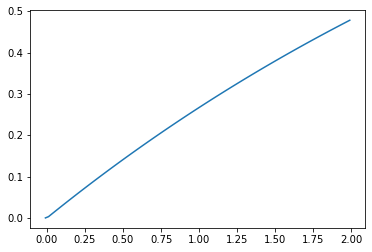

In [7]:
x = np.linspace(-0.01, 1.99, 100)
plt.plot(x, rng.cdf_delay(x, 
                                                   parameter=beta, 
                                                   parameter_type='delay'))

In [50]:
rate = rng.get_rate_parameter(beta, parameter_type='delay')

In [51]:
x = np.linspace(0.01, 0.99, 10)

for xi in x:
    print(xi)
    print(rng.cdf_delay(transformation(xi, rate), rate))
    print()

0.01
0.010000000000000097

0.11888888888888888
0.11888888888888888

0.22777777777777777
0.22777777777777777

0.33666666666666667
0.33666666666666667

0.44555555555555554
0.44555555555555554

0.5544444444444444
0.5544444444444444

0.6633333333333333
0.6633333333333333

0.7722222222222221
0.7722222222222221

0.8811111111111111
0.8811111111111111

0.99
0.99



In [10]:
beta = np.random.uniform()

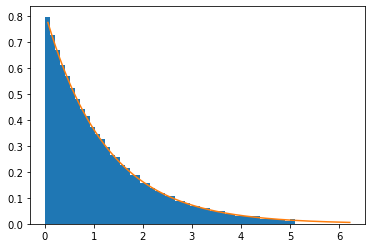

In [11]:
x = np.linspace(0.01, 0.99, 1000)

samples = transformation(x, parameter = beta, parameter_type='delay')

plt.hist(samples, bins=50, density=True);
plt.plot(2*PI*x, rng.pdf_delay(2*PI*x, parameter=beta, parameter_type='delay'))

### Question: 
Can applying `rng.expected_node_degree` to `samples` simulate the degree distribution?

#### Degree distribution

In [5]:
N = 2**9
rho = np.random.uniform(0,0.05)
beta = np.random.uniform()
a = np.random.uniform(0,0.5)

In [14]:
obs_deg_dist = []

for i in range(2**10):
    delas = rng.get_delays(N, beta)
    dists = rng.delays_to_distances(delas)
    simis = rng.distances_to_similarities(dists, a=a)
    probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
    deg_dist = np.sum(squareform(probs) > np.random.uniform(size=[N,N]), axis=1)
    obs_deg_dist.append(deg_dist)
    
obs_deg_dist = np.array(obs_deg_dist).flatten()/(N-1)

In [15]:
exp_deg_dist1 = []

for i in range(2**10):
    delas = rng.get_delays(N, beta)
    dists = rng.delays_to_distances(delas)
    simis = rng.distances_to_similarities(dists, a=a)
    probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
    exp_deg_dist1.append(squareform(probs).mean(axis=0))
    
exp_deg_dist1 = np.array(exp_deg_dist1).flatten()

In [16]:
delas = rng.get_delays(N, beta)
exp_deg_dist2 = np.vectorize(rng.expected_node_degree)(delas, a=a, rho=rho, 
                                                       parameter=beta, parameter_type='delay')

In [17]:
print(np.mean(obs_deg_dist) , np.mean(exp_deg_dist1), np.mean(exp_deg_dist2))
print(np.var(obs_deg_dist)  , np.var(exp_deg_dist1), np.var(exp_deg_dist2))
print(skew(obs_deg_dist)    , skew(exp_deg_dist1), skew(exp_deg_dist2))
print(kurtosis(obs_deg_dist), kurtosis(exp_deg_dist1), kurtosis(exp_deg_dist2))

0.01936887528331779 0.01932851474794209 0.019534823584798064
5.899840314769187e-05 2.1811065119634743e-05 1.990302856856481e-05
-0.11350942625495886 -2.383447101696797 -2.4226112814623537
0.09445741134451957 5.17867034210653 5.266512205716316


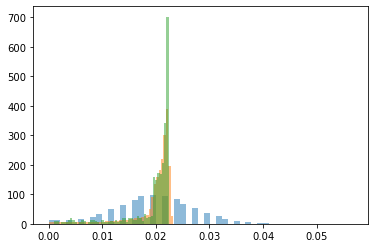

In [18]:
plt.hist(obs_deg_dist, bins=51, density=True, alpha=0.5);
plt.hist(exp_deg_dist1, bins=51, density=True, alpha=0.5);
plt.hist(exp_deg_dist2, bins=51, density=True, alpha=0.5);

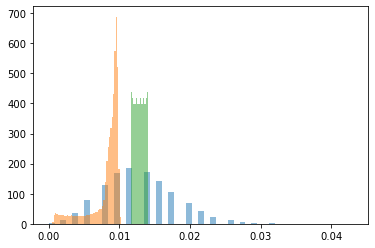

In [86]:
plt.hist(obs_deg_dist , bins=51, density=True, alpha=0.5);
plt.hist(exp_deg_dist , bins=51, density=True, alpha=0.5);
plt.hist(exp_deg_dist2, bins=51, density=True, alpha=0.5);

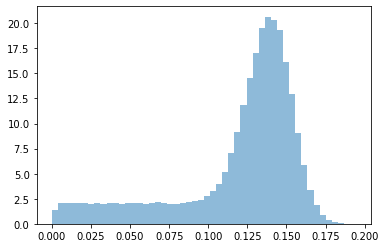

In [258]:
plt.hist(obs_deg_dist, bins=50, density=True, alpha=0.5);
#plt.hist(sim_deg_dist, bins=50, density=True, alpha=0.5);

In [ ]:
delay_to_ineraction_probability(theta, 
                                a = a, 
                                rho = rho, 
                                parameter = beta, 
                                parameter_type = 'delay')

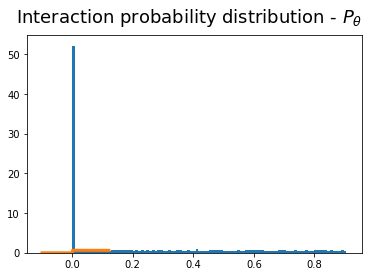

In [154]:
x = np.linspace(-0.1, k+0.1, 200)

plt.hist(probs, density=True, bins=100);
plt.plot(x, rng.pdf_conditional_probability(x, theta, beta, a, rho, 'delay'), linewidth=3)

plt.suptitle(r"Interaction probability distribution - $P_{\theta}$", fontsize=18);

In [155]:
def delay_to_ineraction_probability(theta, a, rho, parameter, parameter_type = 'rate'):
    return quad(lambda x : x*rng.pdf_conditional_probability(x, theta=theta, a = a, rho = rho,
                                                             parameter = parameter, 
                                                             parameter_type = parameter_type), 0, 1)[0]

def approximate_delay_to_interaction_probability(n, a, rho, parameter, parameter_type = 'rate'):
    index  = np.linspace(0, 2*PI, n)
    values = [delay_to_ineraction_probability(idx, 
                                                 a = a, 
                                                 rho = rho, 
                                                 parameter = beta, 
                                                 parameter_type = 'delay')
                      for idx in index]
    
    return pd.Series(values, index=index)

In [156]:
def approximate_degree_distribution(a, rho, parameter, n, parameter_type = 'delay'):
    s = approximate_delay_to_interaction_probability(n = n,
                                                     a = a, 
                                                     rho = rho, 
                                                     parameter = beta, 
                                                     parameter_type = parameter_type)
    
    index  = np.linspace(0, max(s), n)
    values = []
    
    for idx in index:
        if len(s[s < idx]) == 0:
            values.append(0)
        else:
            F1 = rng.cdf_delay(s[s < idx].index[-1], parameter = beta, parameter_type = parameter_type)
            F2 = rng.cdf_delay(s[s < idx].index[0 ], parameter = beta, parameter_type = parameter_type)

            values.append(F1-F2)
        
    return pd.Series(values, index=index)

In [210]:
%%time

N = 2**11

obs_deg_dist = []

for i in range(100):
    delas = rng.get_delays(N, beta)
    dists = rng.delays_to_distances(delas)
    simis = rng.distances_to_similarities(dists, a=a)
    probs = rng.similarities_to_probabilities(simis, a=a, rho=rho, param=beta, parameter_type = 'delay')
    deg_dist = np.sum(squareform(probs) > np.random.uniform(size=[N,N]), axis=1)
    obs_deg_dist += list(deg_dist/(N-1))

CPU times: user 15.9 s, sys: 2.44 s, total: 18.3 s
Wall time: 28 s


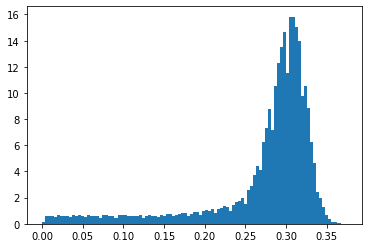

In [208]:
plt.hist(obs_deg_dist, bins=101, density=True);

In [144]:
%%time
s = approximate_degree_distribution(a=a, rho=rho, n=100, parameter=beta, parameter_type='delay')

/Users/markusyoussef/Desktop/git/supplements/venv/ringity/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  after removing the cwd from sys.path.


CPU times: user 28.7 s, sys: 402 ms, total: 29.1 s
Wall time: 30.7 s


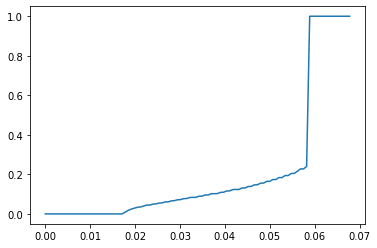

In [145]:
plt.plot(s.index, s.values)

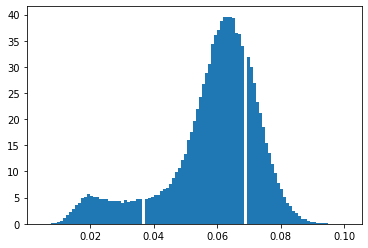

In [146]:
plt.hist(obs_deg_dist, bins=101, density=True);

In [147]:
cdf_x = np.sort(obs_deg_dist)
cdf_y = np.arange(len(obs_deg_dist))/len(obs_deg_dist)

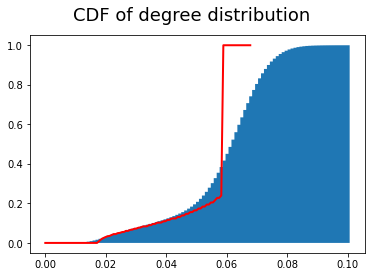

In [148]:
plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(s.index, s.values, linewidth=2, color='r')
plt.suptitle(r"CDF of degree distribution", fontsize=18);

In [98]:
rho

0.05840003316594777

In [52]:
thetas = np.linspace(0, 2*PI, 100)

deg0s = []

for theta in thetas:
    deg0s.append(delay_to_ineraction_probability(theta, 
                                                 a = a, 
                                                 rho = rho, 
                                                 parameter = beta, 
                                                 parameter_type = 'delay'))

/Users/markusyoussef/Desktop/git/supplements/venv/ringity/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  after removing the cwd from sys.path.


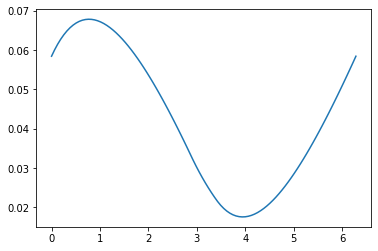

In [53]:
plt.plot(thetas, deg0s)

In [125]:
from scipy.optimize import fsolve

In [127]:
fsolve(lambda x : delay_to_ineraction_probability(theta=x,
                                                  a = a, 
                                                 rho = rho, 
                                                 parameter = beta, 
                                                 parameter_type = 'delay'),
       0)

/Users/markusyoussef/Desktop/git/supplements/venv/ringity/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([-2.60760702])

In [135]:
fsolve(lambda x : delay_to_ineraction_probability(theta=x,
                                                  a = a, 
                                                 rho = rho, 
                                                 parameter = beta, 
                                                 parameter_type = 'delay')-0.2,
       0.01)

array([-0.85681732])

In [130]:
? scipy.optimize.newton

### Network

In [106]:
N = 2**12
rho = 0.05
mu_S = rng.mean_similarity(lamb, a=a)
rate = lamb

In [107]:
pos, G = rng.network_model(N, rho, beta, a=0.5, return_positions=True)

print(nx.density(G))

0.050321585966117216


In [108]:
n_theta, = random.sample(range(N), 1)

theta = pos[n_theta]

print(theta)

0.2548546725420557


In [105]:
len(G[n_theta]), quad(lambda x : x*rng.pdf_conditional_probability(x, theta, beta, a, rho, 'delay'), 0, 1)[0]*(N-1)

(218, 222.9521448679885)

# Not sure if relevant anymore

In [78]:
k = rng.slope(rho, lamb, a)

In [79]:
k

0.06504243777424037

In [80]:
rho

0.05

In [81]:
assert rho > rng.mean_similarity(lamb, a=a), rng.mean_similarity(lamb, a=a)

AssertionError: 0.7687288747317242

In [22]:
k*quad(lambda t : t*rng.pdf_similarity(t, lamb, a=a), 0, 1/k)[0] + \
(1-rng.cdf_similarity(1/k, lamb, a=a))

0.04999999999999923

In [23]:
quad(lambda t : t*rng.pdf_similarity(t, lamb, a=a), 0, 1/k)[0]

0.0007116977771398157

In [64]:
2*a*PI * lamb / np.sinh(PI*lamb) * quad(lambda t : 
                                        t*np.cosh(PI*lamb * (1-2*a*(1-t))), 
                                        0, min(1/k,1))[0]

0.0007116977771398157

In [71]:
def slope_integral(rate, a, k):
    A = np.cosh((2*a-1) * PI * rate)
    B = np.cosh(PI*rate + 2*a*(1/k-1)*PI*rate)
    C = 2*a*PI*lamb*np.sinh(PI*rate + 2*a*(1/k-1)*PI*rate)/k
    
    numerator   = A-B+C
    denominator = (2*a*PI) * rate * np.sinh(PI*rate)
    return numerator / denominator

In [76]:
print(scipy.optimize.newton(
    func = lambda k: slope_integral(rate, a, k) + (1-rng.cdf_similarity(1/k, rate, a)) - rho,
    x0 = rho/mu_S))

11.693615313591526


In [77]:
k

6.112149303264688

In [85]:
mu_S = rng.mean_similarity(rate,a)
const = 1/np.sinh(PI*rate)

def integral(k): # This can probably be further simplified
    term1 = np.sinh((1 + 2*a*(1/k-1))*PI*rate)
    term2 = (k*np.sinh((a*PI*rate)/k)*np.sinh(((a+k-2*a*k)*PI*rate)/k))/(a*PI*rate)
    return term1-term2

print(scipy.optimize.newton(
    func = lambda k: const*(integral(k) + (1/const-np.sinh(rate*(PI-2*a*PI*(1-1/k))))) - rho,
    x0 = rho/mu_S))

6.112149303264961


In [52]:
mu_S = rng.mean_similarity(rate,a)

def k_to_rho(k): # This can probably be further simplified
    A = a*PI*rate
    B = PI*rate
    return 1 - k*np.sinh(A/k)*np.sinh(A/k + (B-2*A)) / (A*np.sinh(B))

print(scipy.optimize.newton(func = lambda k: k_to_rho(k) - rho, x0 = rho/mu_S))

6.112149303265188


In [69]:
mu_S = rng.mean_similarity(rate,a)
const = 1/np.sinh(PI*rate)

def integral(k): # This can probably be further simplified
    term1 = np.sinh((1 + 2*a*(1/k-1))*PI*rate)
    term2 = (k*np.sinh((a*PI*rate)/k)*np.sinh(((a+k-2*a*k)*PI*rate)/k))/(a*PI*rate)
    return term1-term2

print(scipy.optimize.newton(
    func = lambda k: const*integral(k) + (1-rng.cdf_similarity(1/k, rate, a)) - rho,
    x0 = rho/mu_S))

0.004350003072679767

In [70]:
const*integral(k)

0.004350003072680289

In [71]:
slope_integral(rate, a, k)

0.0007116977771437122

In [61]:
rate = lamb

term1 = np.sinh((1 + 2*a*(1/k-1))*PI*rate)
term2 = (k*np.sinh((a*PI*rate)/k)*np.sinh(((a+k-2*a*k)*PI*rate)/k))/(a*PI*rate)
term1-term2

0.03458644612948003

In [55]:
(np.cosh((2*a-1) * PI * lamb) - 
 np.cosh(PI*lamb + 2*a*(1/k-1)*PI*lamb) + 
 2*a*PI*lamb*np.sinh(PI*lamb + 2*a*(1/k-1)*PI*lamb)/k) / \
((2*a*PI) * lamb * np.sinh(PI*lamb))

0.0007116977771437122

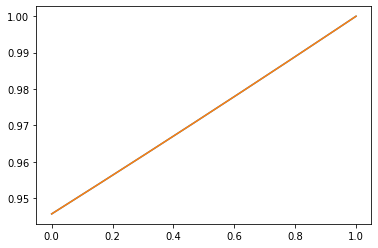

In [83]:
t = np.linspace(0,1, 200)

plt.plot(t, np.sinh(rate*(PI-2*a*PI*(1-t)))/np.sinh(rate*PI))
plt.plot(t, rng.cdf_similarity(t, theta=rate, a=a))

In [46]:
(np.cosh((2*a-1) * PI * lamb) - 
 np.cosh(PI*lamb + 2*a*(1/k-1)*PI*lamb) + 
 2*a*c*PI*lamb*np.sinh(PI*lamb + (2*a)*(1/k-1)*PI*lamb))/((2*a)**2 * (PI*lamb)**2)

0.10212808087268534

In [27]:
1/k

4.689569243318852

In [91]:
c = 2*PI*a

1 - (np.sinh(lamb*(PI-c)) / np.sinh(lamb*PI)) - \
1/(lamb*np.sinh(lamb*PI)*c) * (np.cosh(np.pi*lamb) - c*lamb*np.sinh(lamb*(np.pi-c)) - np.cosh(lamb*(np.pi-c)))

0.027417299558438666

In [95]:
mu_S = rng.mean_similarity(lamb,a)

scipy.optimize.newton(
            func = lambda k: 1 - np.sinh(lamb*(PI-c))/np.sinh(lamb*PI) - \
                             1/(lamb*np.sinh(lamb*PI)*c) * \
                             (np.cosh(np.pi*lamb) - c*lamb*np.sinh(lamb*(np.pi-c)) - np.cosh(lamb*(np.pi-c))) - rho/k,
            x0 = rho/mu_S)

1.823666108816712

In [96]:
k

6.112149303265226

In [97]:
rho/mu_S

1.8236661088167956

In [26]:
t = np.linspace(0,np.pi,200)

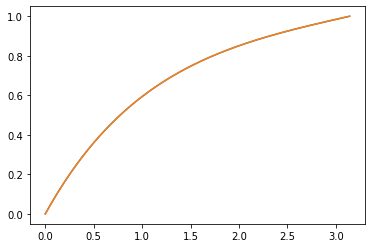

In [28]:
plt.plot(t, rng.cdf_circular_distance(t, lamb))
plt.plot(t, [quad(lambda tau:rng.pdf_circular_distance(tau, lamb), 0, ti)[0] for ti in t])

In [35]:
quad(lambda tau : tau*rng.pdf_circular_distance(tau, lamb), 0, 2*np.pi*a)[0]

0.45854588193670304

In [37]:
c = 2*np.pi*a

1/(lamb*np.sinh(lamb*np.pi)) * (np.cosh(np.pi*lamb) - c*lamb*np.sinh(lamb*(np.pi-c)) - np.cosh(lamb*(np.pi-c)))

0.45854588193670276